# Housekeeping / Importing Data

In [1]:
pip install category_encoders

In [2]:
pip install eli5

In [3]:
pip install pdpbox

In [4]:
import pandas as pd
import numpy as np
from pandas import melt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import eli5

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of th

In [5]:
!wget https://www.dropbox.com/s/1jlb84uib98mncx/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon%20%281%29.csv?dl=0

--2020-07-30 18:35:49--  https://www.dropbox.com/s/1jlb84uib98mncx/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon%20%281%29.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1jlb84uib98mncx/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon%20%281%29.csv [following]
--2020-07-30 18:35:49--  https://www.dropbox.com/s/raw/1jlb84uib98mncx/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucde711067a12914080653d728ca.dl.dropboxusercontent.com/cd/0/inline/A8iXkiHehppirvT3cdXJvfmBSJnVvVmiBFy2U0cJEgCnNfIdV2AUWBnlRVqUcJwiN-5tpAOaBMWnGhWFDpeww1UjdhDHwq_J3vyISY3mvyKFaYe-25YXIn6-zUXLgmRQ2Fo/file# [following]
--2020-07-30 18:35:50--  https://ucde711067a12914080653d728ca.dl.dropboxuserc

In [6]:
!wget https://www.dropbox.com/s/7p73udtgkhn9au8/Metro_mean_doz_pending_uc_sfrcondo_raw_monthly.csv?dl=0

--2020-07-30 18:35:51--  https://www.dropbox.com/s/7p73udtgkhn9au8/Metro_mean_doz_pending_uc_sfrcondo_raw_monthly.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7p73udtgkhn9au8/Metro_mean_doz_pending_uc_sfrcondo_raw_monthly.csv [following]
--2020-07-30 18:35:51--  https://www.dropbox.com/s/raw/7p73udtgkhn9au8/Metro_mean_doz_pending_uc_sfrcondo_raw_monthly.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc48f8ef8dd8949c941becc288ae.dl.dropboxusercontent.com/cd/0/inline/A8hunMMZIQgwCooLN_vDmy0wFP65bssE_BRK6QPx-dza3p8iJHAXvsXWXu8E1iGA2h9JeDR6TuAJKkN10yOLa-Vd4Ly_TSjxoWrbXDKHYuFxzfzJNEQbBWZjqdWn2SYRkAU/file# [following]
--2020-07-30 18:35:51--  https://uc48f8ef8dd8949c941becc288ae.dl.dropboxusercontent.com/cd/0/in

In [7]:
!wget https://www.dropbox.com/s/u4c9ft44p6umlti/Metro_perc_listings_price_cut_uc_sfrcondo_raw_month.csv?dl=0

--2020-07-30 18:35:52--  https://www.dropbox.com/s/u4c9ft44p6umlti/Metro_perc_listings_price_cut_uc_sfrcondo_raw_month.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4c9ft44p6umlti/Metro_perc_listings_price_cut_uc_sfrcondo_raw_month.csv [following]
--2020-07-30 18:35:52--  https://www.dropbox.com/s/raw/u4c9ft44p6umlti/Metro_perc_listings_price_cut_uc_sfrcondo_raw_month.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf8bed493741ca5ff5ecafcfb40.dl.dropboxusercontent.com/cd/0/inline/A8jesuK_IcGo2lULaptcrDqIosgnYo5DVXdU2x2IONLWoMv4CDoBok67r3e3uq-u51Zh8WpwXpUdpIw6Q22Nt_olWyl44KSMfg6XBKjLqToYlfDmIltBDmUps7x1Moj5PY8/file# [following]
--2020-07-30 18:35:52--  https://ucf8bed493741ca5ff5ecafcfb40.dl.dropboxusercont

In [8]:
!wget https://www.dropbox.com/s/v6qtyojcjwpccyh/Metro_invt_fs_uc_sfrcondo_smoothed_month.csv?dl=0

--2020-07-30 18:35:53--  https://www.dropbox.com/s/v6qtyojcjwpccyh/Metro_invt_fs_uc_sfrcondo_smoothed_month.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/v6qtyojcjwpccyh/Metro_invt_fs_uc_sfrcondo_smoothed_month.csv [following]
--2020-07-30 18:35:53--  https://www.dropbox.com/s/raw/v6qtyojcjwpccyh/Metro_invt_fs_uc_sfrcondo_smoothed_month.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc763666a2d5d4e6b4b91a6a903d.dl.dropboxusercontent.com/cd/0/inline/A8i5iI65EMSzeXoSJT8SrSBKF0LaVXAqSFpsUSMZ3F9S3DIT7oV6VS_6byDpa6rlLtEz9kfa2ZnORBvADmw1xUKGW2_eM6840a_V93KCB4-CMq9ixIG-kF_0Py5jT86vIco/file# [following]
--2020-07-30 18:35:54--  https://uc763666a2d5d4e6b4b91a6a903d.dl.dropboxusercontent.com/cd/0/inline/A8i5iI65EMSze

In [9]:
!wget https://www.dropbox.com/s/clpyr4o8esfiper/Metro_med_doz_pending_uc_sfrcondo_raw_monthly.csv?dl=0

--2020-07-30 18:35:54--  https://www.dropbox.com/s/clpyr4o8esfiper/Metro_med_doz_pending_uc_sfrcondo_raw_monthly.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/clpyr4o8esfiper/Metro_med_doz_pending_uc_sfrcondo_raw_monthly.csv [following]
--2020-07-30 18:35:54--  https://www.dropbox.com/s/raw/clpyr4o8esfiper/Metro_med_doz_pending_uc_sfrcondo_raw_monthly.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb63ba29f11345f44f97a50f5e5.dl.dropboxusercontent.com/cd/0/inline/A8gWHBrOB6WW09wmK9Hw_KJXeEpkCfmys6geYzKbx6sT3yrpwa0B8M-qHPRlsAuJt_f1MrAVTmuj8iG6D8XZ4tAeHkNBTE0XhBeiDKl0V3shXn_7V_63uz_jGnuyA-SIxDo/file# [following]
--2020-07-30 18:35:55--  https://ucb63ba29f11345f44f97a50f5e5.dl.dropboxusercontent.com/cd/0/inlin

In [10]:
!wget https://www.dropbox.com/s/hjlvaphvhef55c5/Metro_mlp_uc_sfrcondo_raw_month.csv?dl=0

--2020-07-30 18:35:55--  https://www.dropbox.com/s/hjlvaphvhef55c5/Metro_mlp_uc_sfrcondo_raw_month.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hjlvaphvhef55c5/Metro_mlp_uc_sfrcondo_raw_month.csv [following]
--2020-07-30 18:35:56--  https://www.dropbox.com/s/raw/hjlvaphvhef55c5/Metro_mlp_uc_sfrcondo_raw_month.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4d422b0046148c54960ab87b70.dl.dropboxusercontent.com/cd/0/inline/A8hIpPFe2upmOXgbdYQmSyBGp_KK4kt_fKfchPeEFsrDNta-gd9Qk-fBtFtR8IZIpy8wSnwozvTdW9qbuXy-igIK9kQXmMPrqhf9MiIblocHFA4z82lxHAyELXk5WkIqFXY/file# [following]
--2020-07-30 18:35:56--  https://uc4d422b0046148c54960ab87b70.dl.dropboxusercontent.com/cd/0/inline/A8hIpPFe2upmOXgbdYQmSyBGp_KK4kt_fKfchPeE

In [11]:
!wget https://www.dropbox.com/s/64a5m9ebo0zfw0u/Metro_median_sale_price_uc_SFRCondo_raw_month.csv?dl=0

--2020-07-30 18:35:56--  https://www.dropbox.com/s/64a5m9ebo0zfw0u/Metro_median_sale_price_uc_SFRCondo_raw_month.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/64a5m9ebo0zfw0u/Metro_median_sale_price_uc_SFRCondo_raw_month.csv [following]
--2020-07-30 18:35:57--  https://www.dropbox.com/s/raw/64a5m9ebo0zfw0u/Metro_median_sale_price_uc_SFRCondo_raw_month.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce7cc3520472ecb5283cce18fd2.dl.dropboxusercontent.com/cd/0/inline/A8jcsunX4FjC71QpKmlQ_ZeS-jclp4mGkZnLwegLzIPPaR7xqveh9sdHTZfMH915BF71pMuKef4pnbU_aSohntsVvmdrp4vqzSDkONdqJkd89uqLGmu1UXJMM6qcFQ6Fkj0/file# [following]
--2020-07-30 18:35:57--  https://uce7cc3520472ecb5283cce18fd2.dl.dropboxusercontent.com/cd/0/inlin

In [12]:
#Zillow median sale price
df = pd.read_csv('/content/Metro_median_sale_price_uc_SFRCondo_raw_month.csv?dl=0')
df_msp = df.drop([0])

#Melt data
df_msp = pd.melt(df_msp, id_vars=["RegionID", "SizeRank","RegionName","RegionType","StateName"], 
                  var_name="Date", value_name="MedianSalePrice")
df_msp = df_msp[df_msp['Date']>'2018']


In [13]:
#Zillow median list price
df = pd.read_csv('/content/Metro_mlp_uc_sfrcondo_raw_month.csv?dl=0')
df_mlp = df.drop([0])

#Melt data
df_mlp = pd.melt(df_mlp, id_vars=["RegionID", "SizeRank","RegionName","RegionType","StateName"], 
                  var_name="Date", value_name="MedianListPrice")
df_mlp = df_mlp[df_mlp['Date']>'2018']

In [14]:
#Zillow For Sale Inventory
df = pd.read_csv('/content/Metro_invt_fs_uc_sfrcondo_smoothed_month.csv?dl=0')
df_for_sale = df.drop([0])

#Melt data
df_for_sale = pd.melt(df_for_sale, id_vars=["RegionID", "SizeRank","RegionName","RegionType","StateName"], 
                  var_name="Date", value_name="ForSaleInventory")
df_for_sale = df_for_sale[df_for_sale['Date']>'2018']

In [15]:
#Zillow Share of listings with a Price cut
df0 = pd.read_csv('/content/Metro_perc_listings_price_cut_uc_sfrcondo_raw_month.csv?dl=0')
df_pc = df0.drop([0])
df0.drop(columns=['RegionID','SizeRank','RegionType','StateName'], inplace=True)

#Melt data
df_pc = pd.melt(df_pc, id_vars=["RegionID", "SizeRank","RegionName","RegionType","StateName"], 
                  var_name="Date", value_name="PercentPriceCut")
df_pc = df_pc[df_pc['Date']>'2018']

In [16]:
#Zillow Mean days to Pending
df = pd.read_csv('/content/Metro_mean_doz_pending_uc_sfrcondo_raw_monthly.csv?dl=0')
df_mean_doz = df.drop([0])

#Melt data 
df_mean_doz = pd.melt(df_mean_doz, id_vars=["RegionID", "SizeRank","RegionName","RegionType","StateName"], 
                  var_name="Date", value_name="MeanDaysPending")
df_mean_doz = df_mean_doz[df_mean_doz['Date']>'2018']

In [17]:
#Zillow Median days to Pending
df = pd.read_csv('/content/Metro_med_doz_pending_uc_sfrcondo_raw_monthly.csv?dl=0')
df_med_doz = df.drop([0])

#Melt data
df_med_doz = pd.melt(df_med_doz, id_vars=["RegionID", "SizeRank","RegionName","RegionType","StateName"], 
                  var_name="Date", value_name="MedianDaysPending")
df_med_doz = df_med_doz[df_med_doz['Date']>'2018']

In [18]:
#Zillow Single Family Homes value forecast
df = pd.read_csv('/content/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon (1).csv?dl=0')
df_sfh = df.drop([0])
df_sfh.head()

#Melt data
df_sfh = pd.melt(df_sfh, id_vars=["RegionID", "SizeRank","RegionName","RegionType","StateName"], 
                  var_name="Date", value_name="HomeValueForecast")
df_sfh = df_sfh[df_sfh['Date']>'2018']

In [19]:
#Merge all imported data into a master dataset
df_1 = pd.merge(df_sfh, df_med_doz,  on =["RegionID", "SizeRank","RegionName","RegionType","StateName","Date"],  how ='inner')
df_2 = pd.merge(df_1, df_mean_doz,  on =["RegionID", "SizeRank","RegionName","RegionType","StateName","Date"],  how ='inner')
df_3 = pd.merge(df_2, df_pc,  on =["RegionID", "SizeRank","RegionName","RegionType","StateName","Date"],  how ='inner')
df_4 = pd.merge(df_3, df_for_sale,  on =["RegionID", "SizeRank","RegionName","RegionType","StateName","Date"],  how ='inner')
df_5 = pd.merge(df_4, df_mlp,  on =["RegionID", "SizeRank","RegionName","RegionType","StateName","Date"],  how ='inner')
df_clean = pd.merge(df_5, df_msp,  on =["RegionID", "SizeRank","RegionName","RegionType","StateName","Date"],  how ='inner')

print(df_clean.shape)

(2938, 13)


#Wrangle

In [20]:
#Drop Repetive Features
df_clean.drop(columns = ['RegionType','RegionName'], axis=1, inplace=True)

#Drop NaNs from Target
df_clean.dropna(subset = ['PercentPriceCut'], inplace=True)

#Change Date to datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%Y-%m-%d')

#Break into month and year
df_clean['year'] = df_clean['Date'].dt.year
df_clean['month'] = df_clean['Date'].dt.month


In [21]:
#Train/Test Split

X = df_clean

train = X[X['Date'] < '2019-10-01']
test = X[X['Date'] > '2019-10-01']

train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)

train.drop(columns = ['Date'], axis=1, inplace=True)
val.drop(columns = ['Date'], axis=1, inplace=True)
test.drop(columns = ['Date'], axis=1, inplace=True)

print(train.shape)
print(val.shape)
print(test.shape)



(1622, 12)
(406, 12)
(904, 12)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Baseline Predictions

In [22]:
#Take the Mean of the Price Cut answers on my Train data 

mean_train = train['PercentPriceCut'].mean()
errors = mean_train - train['PercentPriceCut']
MAE_train = errors.abs().mean()


print(f'Train Baseline mean: {mean_train:.2f}')
print(f'Mean Absolute Error: {MAE_train:.2f}')


Train Baseline mean: 0.18
Mean Absolute Error: 0.03


In [23]:
#Setting Target. Can we accurately predict the monthly price cut of a Metro Market? Regression problem
target = 'PercentPriceCut'
features = train.drop(columns=[target])

X_train = train.drop(columns=[target])
y_train = train[target]
X_val = val.drop(columns=[target])
y_val = val[target]
X_test = test.drop(columns=[target])
y_test = test[target]

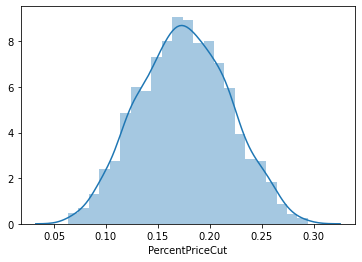

In [24]:
# Lets look at the distribution of our target
sns.distplot(y_train);

# Build Model(s)

In [25]:
#RandomForestRegressor Model

# Converting Categorical to numerical and filling in NaNs
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'))

#Applying our transformers
X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

# Fit on train, score on val
#model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
#Tuned
model = RandomForestRegressor(max_depth=20, n_estimators=1500, random_state=42, n_jobs=-1, max_features=0.9507143064099162)
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_val_transformed)


print(f'MAE Val: {mean_absolute_error(y_val, y_pred):.2f}')
print(f'R2 Val: {r2_score(y_val, y_pred):.2f}')




MAE Val: 0.01
R2 Val: 0.82


In [26]:
# Using our test data on the model
X_test_transformed = transformers.transform(X_test)

y_pred = model.predict(X_test_transformed)


print(f'MAE Test: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'R2 Test: {r2_score(y_test, y_pred):.2f}')

MAE Test: 0.03
R2 Test: 0.34


In [27]:
#XGBoost Model

# Fit on train, score on val
#model2 = XGBRegressor(n_estimators=100, random_state=42, n_jobs=6)
#Tuned
model2 = XGBRegressor(max_depth = 10, n_estimators=264, random_state=42, n_jobs=6)
model2.fit(X_train_transformed, y_train)

y_pred2 = model2.predict(X_val_transformed)

print(f'MAE Val: {mean_absolute_error(y_val, y_pred2):.2f}')
#print(f'MSE Val: {mean_squared_error(y_val, y_pred2):.2f}')
print(f'R2 Val: {r2_score(y_val, y_pred2):.2f}')

[18:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE Val: 0.01
R2 Val: 0.88


In [28]:
# Using our test data on the model
X_test_transformed = transformers.transform(X_test)

y_pred = model2.predict(X_test_transformed)


print(f'MAE Test: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'R2 Test: {r2_score(y_test, y_pred):.2f}')

MAE Test: 0.03
R2 Test: 0.33


In [29]:
#Ridge Regression Model

# Fit on train, score on val
model3 = Ridge(normalize=True, alpha=0.05)
model3.fit(X_train_transformed, y_train)

y_pred3 = model3.predict(X_val_transformed)

print(f'MAE Val: {mean_absolute_error(y_val, y_pred3):.2f}')
#print(f'MSE Val: {mean_squared_error(y_val, y_pred3):.2f}')
print(f'R2 Val: {r2_score(y_val, y_pred3):.2f}')

MAE Val: 0.03
R2 Val: 0.24


In [30]:
# Using our test data on the model
X_test_transformed = transformers.transform(X_test)

y_pred = model3.predict(X_test_transformed)


print(f'MAE Test: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'R2 Test: {r2_score(y_test, y_pred):.2f}')

MAE Test: 0.05
R2 Test: -1.30


# Communicate Results

In [31]:
#RandomForest Permutation
permuter = PermutationImportance(
    model,
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

#Print Results
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)


Weight,Feature
0.6435 ± 0.0969,month
0.1710 ± 0.0125,ForSaleInventory
0.1570 ± 0.0230,HomeValueForecast
0.1405 ± 0.0229,SizeRank
0.0846 ± 0.0203,StateName
0.0708 ± 0.0107,RegionID
0.0525 ± 0.0176,MeanDaysPending
0.0371 ± 0.0076,MedianDaysPending
0.0346 ± 0.0030,MedianListPrice
0.0229 ± 0.0051,MedianSalePrice


In [32]:
# XGBoost Permutation
permuter = PermutationImportance(
    model2,
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

#Print Results
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

Weight,Feature
0.6973 ± 0.0924,month
0.2476 ± 0.0354,ForSaleInventory
0.1947 ± 0.0248,HomeValueForecast
0.1889 ± 0.0324,SizeRank
0.0770 ± 0.0217,StateName
0.0762 ± 0.0171,RegionID
0.0752 ± 0.0114,MeanDaysPending
0.0339 ± 0.0052,MedianListPrice
0.0262 ± 0.0062,year
0.0246 ± 0.0107,MedianDaysPending


In [33]:
#Ridge Regression Permutation

permuter = PermutationImportance(
    model3,
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

#Print Results
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

Weight,Feature
0.2625 ± 0.0394,MeanDaysPending
0.1277 ± 0.0359,month
0.0883 ± 0.0378,HomeValueForecast
0.0625 ± 0.0232,SizeRank
0.0459 ± 0.0253,MedianSalePrice
0.0356 ± 0.0167,year
0.0305 ± 0.0135,ForSaleInventory
0.0252 ± 0.0187,MedianListPrice
0.0032 ± 0.0049,MedianDaysPending
0.0011 ± 0.0028,RegionID


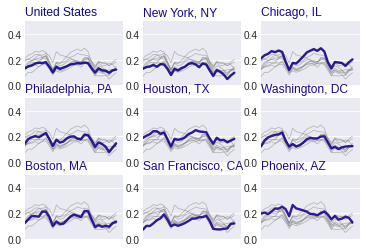

In [34]:
#Creating a Multi Line Chart to visualize target data


columns = ['RegionName',
 'United States',
 'New York, NY',
 'Boston, MA',
 'Chicago, IL',
 'Seattle, WA',
 'Philadelphia, PA',
 'Houston, TX',
 'Washington, DC',
 'San Francisco, CA',
 'Phoenix, AZ'
 ]

columns_drop = ['Dallas-Fort Worth, TX','Atlanta, GA',
 'Los Angeles-Long Beach-Anaheim, CA',
 'Miami-Fort Lauderdale, FL',
 'Detroit, MI',
 'Riverside, CA',
 'Seattle, WA',
 'Minneapolis-St Paul, MN',
 'San Diego, CA',
 'St. Louis, MO',
 'Tampa, FL',
 'Baltimore, MD',
 'Denver, CO',
 'Pittsburgh, PA',
 'Portland, OR',
 'Charlotte, NC',
 'Sacramento, CA',
 'San Antonio, TX',
 'Orlando, FL',
 'Cincinnati, OH',
 'Cleveland, OH',
 'Kansas City, MO',
 'Las Vegas, NV',
 'Columbus, OH',
 'Indianapolis, IN',
 'San Jose, CA',
 'Austin, TX',
 'Virginia Beach, VA',
 'Nashville, TN',
 'Providence, RI',
 'Milwaukee, WI',
 'Jacksonville, FL',
 'Memphis, TN',
 'Oklahoma City, OK',
 'Louisville-Jefferson County, KY',
 'Hartford, CT',
 'Richmond, VA',
 'New Orleans, LA',
 'Buffalo, NY',
 'Raleigh, NC',
 'Birmingham, AL',
 'Salt Lake City, UT',
 'Rochester, NY',
 'Grand Rapids, MI',
 'Tucson, AZ',
 'Urban Honolulu, HI',
 'Tulsa, OK',
 'Fresno, CA',
 'Worcester, MA',
 'Stamford, CT',
 'Albuquerque, NM',
 'Albany, NY',
 'Omaha, NE',
 'New Haven, CT',
 'Bakersfield, CA',
 'Knoxville, TN',
 'Greenville, SC',
 'Ventura, CA',
 'Allentown, PA',
 'El Paso, TX',
 'Baton Rouge, LA',
 'Dayton, OH',
 'McAllen, TX',
 'Columbia, SC',
 'Greensboro, NC',
 'Akron, OH',
 'North Port-Sarasota-Bradenton, FL',
 'Little Rock, AR',
 'Stockton, CA',
 'Charleston, SC',
 'Syracuse, NY',
 'Colorado Springs, CO',
 'Winston-Salem, NC',
 'Wichita, KS',
 'Springfield, MA',
 'Fort Myers, FL',
 'Boise City, ID',
 'Toledo, OH',
 'Madison, WI',
 'Lakeland, FL',
 'Ogden, UT',
 'Daytona Beach, FL',
 'Des Moines, IA',
 'Jackson, MS',
 'Augusta, GA',
 'Harrisburg, PA',
 'Provo, UT',
 'Durham, NC',
 'Port St. Lucie, FL',
 'Vallejo, CA',
 'Killeen, TX',
 'Salem, OR',
 'Ocala, FL',
 'Fort Collins, CO',
 'Boulder, CO',
 'Clarksville, TN',
 'Greeley, CO',
 'Macon-Bibb County, GA',
 'Athens, GA',
 'Gainesville, GA',
 'Yuba City, CA',
 'Punta Gorda, FL',
 'Pueblo, CO',
 'Sherman, TX',
 'Dunn, NC',
 'Truckee, CA',
 'The Villages, FL',
 'Faribault, MN',
 'Albemarle, NC',
 'Kerrville, TX',
 'Shelbyville, TN',
 'Wilmington, OH']

dft=df0.T.reset_index()

dft.columns = dft.iloc[0]
dft = dft.drop(dft.index[0])

dft0 = dft.drop(columns=columns_drop)

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('plasma')
 
# multiple line plot
num=0
for column in dft0.drop('RegionName', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # plot every groups, but discreet
    for v in dft0.drop('RegionName', axis=1):
        plt.plot(dft0['RegionName'], dft[v], marker='', color='grey', linewidth=0.8, alpha=0.5)
 
    # Plot the lineplot
    plt.plot(dft0['RegionName'], dft0[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    # Same limits for everybody!
    plt.xlim(0,28)
    plt.ylim(0,.5)

    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(True)
 
    # Not ticks everywhere
    if num in range(7) :
      plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
      plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
#plt.suptitle("Monthly Price Cut by Metro", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)


plt.savefig('metrocuts.png', transparent=False, dpi=300)
plt.show();


In [35]:
# Partial Dependency
#Creating a replica pipeline due to transforming outside of the pipeline in previous instance

rf = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'),
    RandomForestRegressor(n_estimators=1500, random_state=42, n_jobs=-1, max_features=3)
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


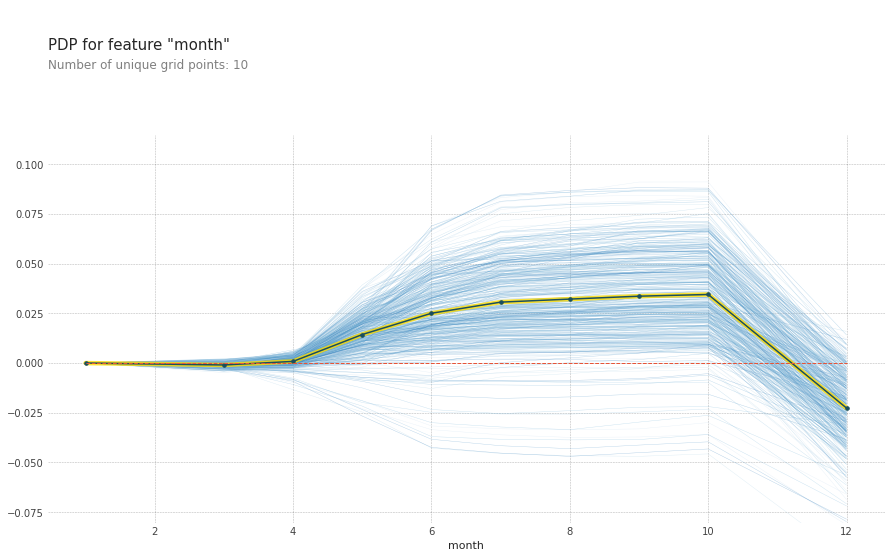

In [36]:
#PDP
from pdpbox.pdp import pdp_isolate, pdp_plot

plt.rcParams['figure.dpi'] = 72

feature = 'month'

isolated = pdp_isolate(
    model=rf,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature, plot_lines=True);

# Tuning

In [37]:
#Hyperparameter selection for RandomForest

from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=6, 
    random_state=42
)

search.fit(X_train_transformed, y_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of  10 | elapsed:    6.2s remaining:   14.5s
[Parallel(n_jobs=6)]: Done   5 out of  10 | elapsed:    6.8s remaining:    6.8s
[Parallel(n_jobs=6)]: Done   7 out of  10 | elapsed:    8.1s remaining:    3.5s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    8.7s finished


In [38]:
print('Best hyperparameters for RandomForest', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
mod = search.best_estimator_

Best hyperparameters for RandomForest {'max_depth': None, 'max_features': 0.6011150117432088, 'n_estimators': 201}
Cross-validation MAE 0.01700963574504725


In [39]:
#Hyperparameter selection for XGBoost

from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
}

search = RandomizedSearchCV(
    XGBRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=6, 
    random_state=42
)

search.fit(X_train_transformed, y_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Batch computation too fast (0.0849s.) Setting batch_size=2.
[Parallel(n_jobs=6)]: Done   3 out of  10 | elapsed:    1.3s remaining:    3.1s
[Parallel(n_jobs=6)]: Done   5 out of  10 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=6)]: Done   7 out of  10 | elapsed:    1.6s remaining:    0.7s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    1.9s finished


[18:36:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [40]:
print('Best hyperparameters for XGB', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
mod = search.best_estimator_

Best hyperparameters for XGB {'max_depth': 10, 'n_estimators': 264}
Cross-validation MAE 0.014488131438906773
